# Examining locations of bikeshare systems in US cities

https://data.bts.gov/stories/s/fwcs-jprj

In many US cities, one can find a bikesharing system in place.

A bikesharing system allows an individual to pay a small fee to grab a bike from a station. The user can ride it one way to another station for drop off.

This system is used by people commuting to work, tourists, or local residents that just want to have a relaxing bikeride.

In Boston, this system is called Bluebikes.

For $109 a year, the customer gets unlimited access to this system with no additional charges, making it an easy and affordable way to enjoy the benefits that come with biking in a city.

Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in CSV:

In [2]:
df = pd.read_csv("Locations_of_Docked_Bikeshare_Stations_by_System_and_Year.csv")

In [3]:
df.describe()

,ID,SYSTEM_ID,YEAR,ASOFDATE,ZIPCODE,CBSA_CODE,LONGITUDE,LATITUDE
count,42057.000000,42057.000000,42057.000000,42057.000000,42057.000000,42057.000000,42057.000000,42057.000000
mean,21034.811946,44.273129,2018.379390,201849.938988,46939.749364,31239.217253,-90.705045,38.428575
std,12149.290721,34.703032,1.884395,188.439457,31502.973593,11485.459247,18.165224,5.062084
min,1.000000,1.000000,2015.000000,201512.000000,0.000000,0.000000,-157.870423,21.267900
25%,10515.000000,11.000000,2017.000000,201712.000000,19103.000000,17460.000000,-97.401744,36.159730
50%,21029.000000,42.000000,2018.000000,201812.000000,45402.000000,33460.000000,-86.591966,39.968180
75%,31543.000000,60.000000,2020.000000,202012.000000,77030.000000,38900.000000,-76.976900,41.866492
max,42091.000000,152.000000,2021.000000,202112.000000,98104.000000,49180.000000,-70.753969,47.666145


# Bikeshare Systems by Year

In [4]:
df2 = df.groupby("YEAR").size()
df2

YEAR
2015    3362
2016    4882
2017    6132
2018    7042
2019    6809
2020    6361
2021    7469
dtype: int64

Text(0, 0.5, '# of bikeshare stations')

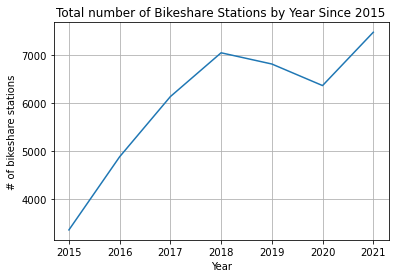

In [5]:
plt.plot(df2)
plt.grid()
plt.title('Total number of Bikeshare Stations by Year Since 2015')
plt.xlabel("Year")
plt.ylabel("# of bikeshare stations")

# Which Cities Have the Most Bikeshare Stations?

In [6]:
df3 = df.groupby("CITY").size()

df3 = df3.sort_values(ascending=False)
df3.head(20)

CITY
Chicago          3940
New York         3170
Washington       1952
Brooklyn         1900
Minneapolis      1287
San Francisco    1123
Boston            973
Portland          906
Philadelphia      865
Topeka            810
Los Angeles       746
Arlington         665
Atlanta           643
Honolulu          636
Pittsburgh        573
Miami Beach       551
Houston           535
Milwaukee         478
Miami             470
Austin            467
dtype: int64

### Some interesting points:
- NYC is the winner (when we include Brooklyn)
-Minneapolis and Topeka have quite a few, considering their size
-Los Angeles, despite being the 2nd largest city in the country, comes in at #11.
-Some noteable exclusions from the top 20 cities are Seattle, Indianapolis, Detroit, Dallas, Nashville, and Phoenix.

# Which brand has the most stations?

In [8]:
df4 = df.groupby("SYSTEM_NAME").size()

df4 = df4.sort_values(ascending=False)
df4.head(20)

SYSTEM_NAME
Citi Bike                                                                            6216
Divvy                                                                                4124
Capital Bikeshare                                                                    3674
Bay Area BikeShare (became Ford GoBike 06/28/2017 then became Bay Wheels 06/2019)    2245
Hubway (03/2018 re-launched as Blue Bikes)                                           1738
Nice Ride Minnesota (became partially dockless in 2018)                              1528
Citi Bike Miami                                                                      1022
Metro Bike Share Los Angeles                                                          908
BikeTown Portland                                                                     906
Inde'go                                                                               865
Topeka Metro Bikes                                                                    81

# 

In [21]:
df5 = pd.pivot_table(df,columns = "YEAR",index="CITY",aggfunc='size')
df5.describe()

YEAR,2015,2016,2017,2018,2019,2020,2021
count,100.000000,149.000000,196.000000,220.000000,217.000000,188.000000,209.000000
mean,33.620000,32.765101,31.285714,32.009091,31.377880,33.835106,35.736842
std,62.817642,64.579240,61.615932,64.580062,63.463062,71.671409,83.072852
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.750000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,13.000000,13.000000,11.000000,10.000000,10.000000,9.500000,8.000000
75%,33.500000,37.000000,36.000000,35.000000,34.000000,35.250000,33.000000
max,469.000000,559.000000,563.000000,594.000000,564.000000,568.000000,645.000000


# FINDINGS
- Bikesharing systems are growing in popularity around the United States
-There is a lot of room for bikesharing systems to grow in cities such as LA, which have very few bikes compared to cities like Chicago and NYC.
-There is healthy competition among systems, with each city usually having its own system.